Movie Genre Classification

In [ ]:
# Objective :- Predict the genre of a movie based on its plot summary or other textual information 
#              using techniques like TF-IDF or word embedding with classifiers.

In [2]:
# Step 1 :- Import Required Libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [4]:
# Step 2 :- Load Training Dataset

try:
    train_data = pd.read_csv('Genre Classification Dataset/train_data.txt', sep=':::', engine='python', names=['title', 'genre', 'description'])
except FileNotFoundError:
    print("Error: 'train_data.txt' not found in 'Genre Classification Dataset' folder.")
    exit()
except Exception as e:
    print(f"Error loading train_data.txt: {e}")
    exit()

In [6]:
# Step 3 :- Training Data Exploration

print("### Training Data Exploration ###")
print("Dataset Shape:", train_data.shape)
print("Columns:", train_data.columns.tolist())
print("Genre Distribution:\n", train_data['genre'].value_counts())
print("Missing Values:\n", train_data.isnull().sum())

### Training Data Exploration ###
Dataset Shape: (54214, 3)
Columns: ['title', 'genre', 'description']
Genre Distribution:
 genre
 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: count, dtype: int64
Missing Values:
 title          0
genre          0
description    0
dtype: int64


In [8]:
# Step 4 :- Training Data Preprocessing

# Handle Missing Values
train_data = train_data.dropna(subset=['description', 'genre'])

# Features and Target
X_train = train_data['description']
y_train = train_data['genre']

# Convert text to TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english', lowercase=True)
try:
    X_train_tfidf = vectorizer.fit_transform(X_train)
except Exception as e:
    print(f"Error in TF-IDF transformation: {e}")
    exit()
print("Training TF-IDF Matrix Shape:", X_train_tfidf.shape)

Training TF-IDF Matrix Shape: (54214, 5000)


In [10]:
# Step 5 :- Train Test Split (for validation)

X_train_split, X_val, y_train_split, y_val = train_test_split(X_train_tfidf, y_train, test_size=0.2, random_state=42)
print("Training Split Shape:", X_train_split.shape)
print("Validation Split Shape:", X_val.shape)

Training Split Shape: (43371, 5000)
Validation Split Shape: (10843, 5000)


In [12]:
# Step 6 :- Model Training

# Logistic Regression: Effective for Multi-Class text Classification
model = LogisticRegression(max_iter=1000, class_weight='balanced')
try:
    model.fit(X_train_split, y_train_split)
    print("Model Training Completed")
except Exception as e:
    print(f"Error training model: {e}")
    exit()

Model Training Completed


In [14]:
# Step 7 :- Model Validation Evaluation

y_val_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
print("\n### Validation Evaluation ###")
print("Validation Accuracy:", round(accuracy, 4))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred, zero_division=0))


### Validation Evaluation ###
Validation Accuracy: 0.4489

Classification Report:
                precision    recall  f1-score   support

      action        0.33      0.42      0.37       263
       adult        0.26      0.62      0.37       112
   adventure        0.16      0.32      0.21       139
   animation        0.18      0.33      0.23       104
   biography        0.05      0.16      0.07        61
      comedy        0.62      0.43      0.51      1443
       crime        0.15      0.39      0.21       107
 documentary        0.81      0.53      0.64      2659
       drama        0.71      0.36      0.47      2697
      family        0.12      0.32      0.17       150
     fantasy        0.09      0.19      0.13        74
   game-show        0.62      0.75      0.68        40
     history        0.04      0.18      0.07        45
      horror        0.56      0.70      0.62       431
       music        0.36      0.76      0.49       144
     musical        0.11      0.32 

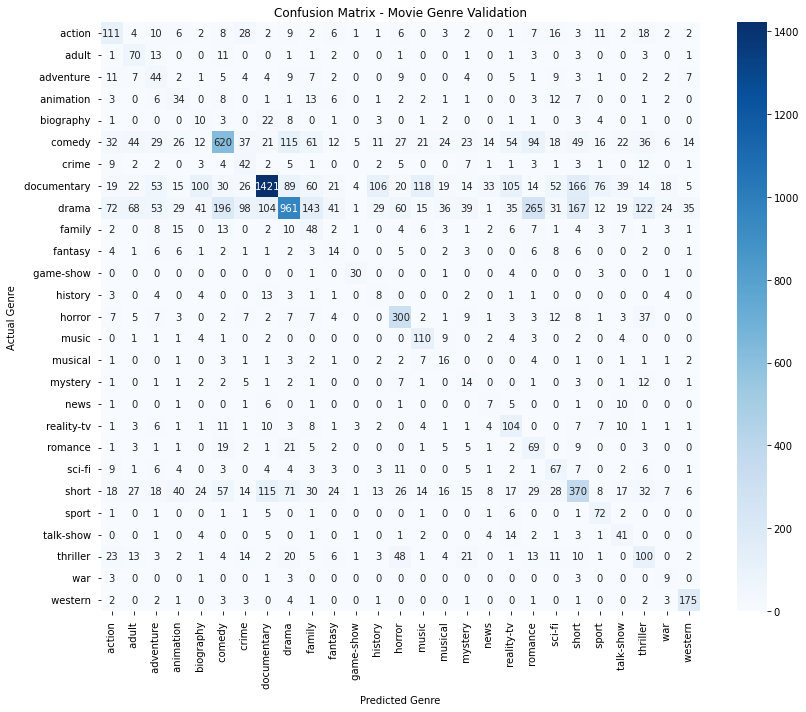

In [16]:
# Step 8 :- Visualize Confusion Matrix

cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix - Movie Genre Validation')
plt.xlabel('Predicted Genre')
plt.ylabel('Actual Genre')
plt.tight_layout()
plt.show()

In [18]:
# Step 9 :- Load Test Datasets

try:
    test_data = pd.read_csv('Genre Classification Dataset/test_data.txt', sep=':::', engine='python', names=['id', 'title', 'description'])
except FileNotFoundError:
    print("Error: 'test_data.txt' not found in 'Genre Classification Dataset' folder.")
    exit()
except Exception as e:
    print(f"Error loading test_data.txt: {e}")
    exit()

try:
    solution_data = pd.read_csv('Genre Classification Dataset/test_data_solution.txt', sep=':::', engine='python', names=['id', 'title', 'genre', 'description'])
except FileNotFoundError:
    print("Error: 'test_data_solution.txt' not found in 'Genre Classification Dataset' folder.")
    exit()
except Exception as e:
    print(f"Error loading test_data_solution.txt: {e}")
    exit()

In [20]:
# Step 10 :- Test Data Preprocessing

test_data = test_data.dropna(subset=['description'])
solution_data = solution_data.dropna(subset=['description', 'genre'])
test_data = test_data[test_data['id'].isin(solution_data['id'])]
solution_data = solution_data[solution_data['id'].isin(test_data['id'])]
X_test = test_data['description']
y_true = solution_data['genre']
print("\nTest Data Shape:", test_data.shape)


Test Data Shape: (54200, 3)


In [22]:
# Step 11 :- Transform Test Data

try:
    X_test_tfidf = vectorizer.transform(X_test)
    print("Test TF-IDF Matrix Shape:", X_test_tfidf.shape)
except Exception as e:
    print(f"Error in TF-IDF transformation: {e}")
    exit()

Test TF-IDF Matrix Shape: (54200, 5000)


In [24]:
# Step 12 :- Make Predictions

y_pred = model.predict(X_test_tfidf)
print("Test Predictions Completed")

Test Predictions Completed


In [26]:
# Step 13 :- Test Evaluation

accuracy = accuracy_score(y_true, y_pred)
print("\n=== Test Set Evaluation ===")
print("Test Accuracy:", round(accuracy, 4))
print("\nClassification Report:\n", classification_report(y_true, y_pred, zero_division=0))


=== Test Set Evaluation ===
Test Accuracy: 0.4457

Classification Report:
                precision    recall  f1-score   support

      action        0.31      0.43      0.36      1314
       adult        0.29      0.62      0.39       590
   adventure        0.17      0.31      0.22       775
   animation        0.15      0.27      0.20       498
   biography        0.04      0.15      0.06       264
      comedy        0.61      0.40      0.48      7446
       crime        0.13      0.37      0.19       505
 documentary        0.80      0.54      0.65     13096
       drama        0.72      0.36      0.48     13612
      family        0.13      0.31      0.18       783
     fantasy        0.10      0.23      0.14       322
   game-show        0.57      0.74      0.65       193
     history        0.07      0.27      0.11       243
      horror        0.53      0.63      0.58      2204
       music        0.36      0.72      0.48       731
     musical        0.12      0.32      0.1

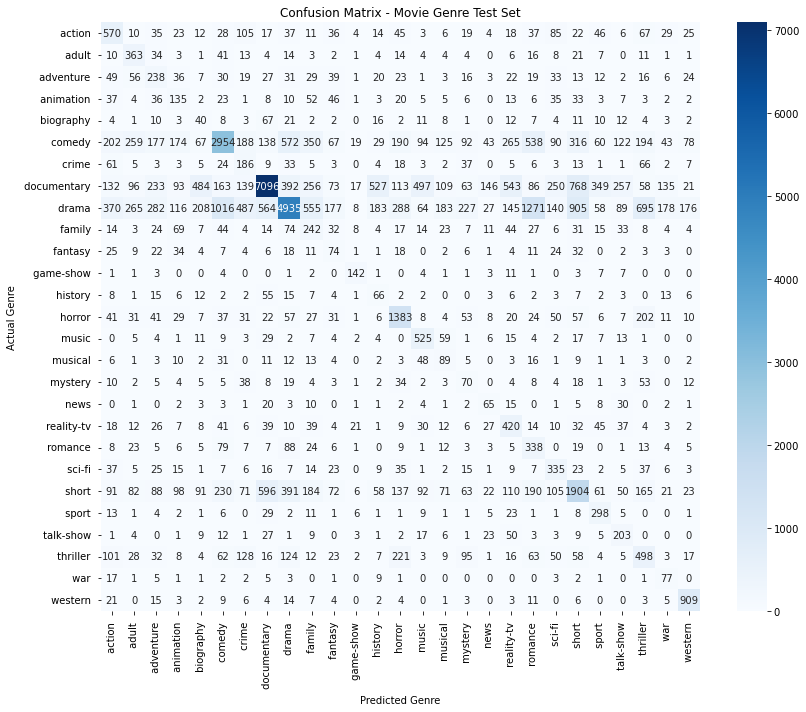

In [28]:
# Step 14 :- Test Confusion Matrix

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix - Movie Genre Test Set')
plt.xlabel('Predicted Genre')
plt.ylabel('Actual Genre')
plt.tight_layout()
plt.show()

In [30]:
# Step 15 :- Format Predictions

predictions = test_data[['id', 'title', 'description']].copy()
predictions['predicted_genre'] = y_pred
predictions['predicted_genre'] = predictions['predicted_genre'].str.strip()
predictions['title'] = predictions['title'].str.strip()
predictions['description'] = predictions['description'].str.strip()
output = predictions.apply(lambda row: f"{row['id']} ::: {row['title']} ::: {row['predicted_genre']} ::: {row['description']}", axis=1)

In [32]:
# Step 16 :- Save Predictions

output_file = 'movie_genre_predictions.txt'
with open(output_file, 'w', encoding='utf-8') as f:
    for line in output:
        f.write(line + '\n')
print(f"Predictions saved to '{output_file}'")

Predictions saved to 'movie_genre_predictions.txt'


In [34]:
# Step 17 :- Show Sample Predictions

print("\n### Sample Predictions (First 10) ###")
for line in output.head(10):
    print(line)


### Sample Predictions (First 10) ###
1 ::: Edgar's Lunch (1998) ::: short ::: L.R. Brane loves his life - his car, his apartment, his job, but especially his girlfriend, Vespa. One day while showering, Vespa runs out of shampoo. L.R. runs across the street to a convenience store to buy some more, a quick trip of no more than a few minutes. When he returns, Vespa is gone and every trace of her existence has been wiped out. L.R.'s life becomes a tortured existence as one strange event after another occurs to confirm in his mind that a conspiracy is working against his finding Vespa.
2 ::: La guerra de papá (1977) ::: drama ::: Spain, March 1964: Quico is a very naughty child of three belonging to a wealthy middle-class family. Since Cristina's birth, he feels he has lost the privileged position of "prince" of the house for his eight months old sister. So, with his brother Juan, who is eight years old and is quite disobedient, spend their time committing prank after prank, causing the r

In [36]:
# Step 18 :- Compare with true genres

comparison = solution_data[['id', 'title', 'genre']].copy()
comparison['predicted_genre'] = y_pred
comparison['correct'] = comparison['genre'] == comparison['predicted_genre']
print("\n=== Prediction Accuracy Summary ===")
print("Correct Predictions:", comparison['correct'].sum())
print("Total Predictions:", len(comparison))
print("Sample Comparison (First 10):\n", comparison[['id', 'title', 'genre', 'predicted_genre', 'correct']].head(10))


=== Prediction Accuracy Summary ===
Correct Predictions: 24155
Total Predictions: 54200
Sample Comparison (First 10):
    id                                         title          genre  \
0   1                         Edgar's Lunch (1998)       thriller    
1   2                     La guerra de papá (1977)         comedy    
2   3                  Off the Beaten Track (2010)    documentary    
3   4                       Meu Amigo Hindu (2015)          drama    
4   5                            Er nu zhai (1955)          drama    
5   6                           Riddle Room (2016)         horror    
6   7                               L'amica (1969)          drama    
7   8                         Ina Mina Dika (1989)         comedy    
8   9   Equinox Special: Britain's Tornados (2005)    documentary    
9  10                                 Press (2011)          drama    

  predicted_genre  correct  
0          short     False  
1          drama     False  
2    documentary      

In [38]:
# Step 19 :- Save Model and Vectorizer

joblib.dump(model, 'movie_genre_model.pkl')
joblib.dump(vectorizer, 'movie_tfidf_vectorizer.pkl')
print("Model and vectorizer saved as 'movie_genre_model.pkl' and 'movie_tfidf_vectorizer.pkl'")

Model and vectorizer saved as 'movie_genre_model.pkl' and 'movie_tfidf_vectorizer.pkl'
